In [103]:
# Machine Learning Engineering HW #2
# Nicholas March
# 661848406

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

In [104]:
# Problem 1
iris = load_iris()

# define new features
sepal_ratio = (iris.data.T[0] / iris.data.T[1]) # ratio of sepal length to sepal width
petal_ratio = (iris.data.T[2] / iris.data.T[3]) # ratio of petal length to petal width

# define feature and target arrays
X = np.zeros((len(sepal_ratio), 2))
for i in range(len(sepal_ratio)):
    X[i][0] = sepal_ratio[i]
    X[i][1] = petal_ratio[i]
y = iris.target

# split data and keep some separate for testing
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

# import and train SVM model
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

# make prediction and print
preds = clf.predict(X_test)
print("Prediction:",preds)

# provide actual species for comparison
print('\nActual Iris Species:',y_test)

# calculate accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('\nAccuracy Score:', acc)

Prediction: [2 1 1 2 0 2 1 0 0 1 0 2 2 2 1 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 1 0 1 2 2 2 1
 2 0 1 0 1 2 2 0 1 2 1 0 0 1 1 1 1 1 1 1 1 1 2]

Actual Iris Species: [1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]

Accuracy Score: 0.75


Each of the 28x28 (or 784) pixels in an MNIST image is a feature,       
which makes it impractical to represent the data via pairplots.

training images shapes:  (29492, 784)
testing images shapes:  (4926, 784)
training targets shapes:  (29492,)
testing targets shapes:  (4926,)

preds: [2 0 4 ... 2 4 6]
actual: [2 0 4 ... 2 4 6]


<IPython.core.display.Javascript object>


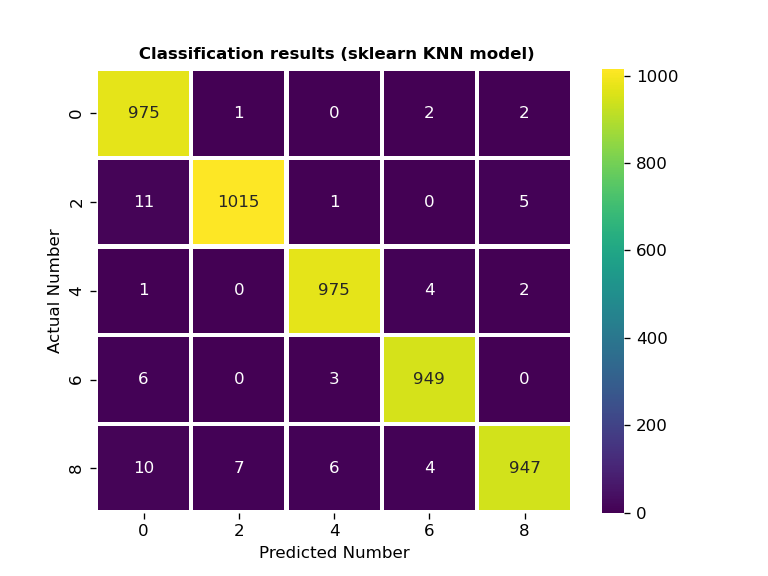

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926


Number of Sixes Correctly Identified: 949 



In [105]:
# Problem 2
from keras.datasets import mnist
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()
print("Each of the 28x28 (or 784) pixels in an MNIST image is a feature,\
       \nwhich makes it impractical to represent the data via pairplots.")

# remove odd numbers
x_train_even = []
y_train_even = []
x_test_even = []
y_test_even = []
for i in range(len(y_train_full)):
    if y_train_full[i] % 2 == 0:
        x_train_even.append(x_train_full[i].flatten())
        y_train_even.append(y_train_full[i])
    if i < len(y_test_full):
        if y_test_full[i] % 2 == 0:
            x_test_even.append(x_test_full[i].flatten())
            y_test_even.append(y_test_full[i])
x_train_even = np.array(x_train_even)
y_train_even = np.array(y_train_even)
x_test_even = np.array(x_test_even)
y_test_even = np.array(y_test_even)
        
# display training and testing array sizes after odd number removal
print("\ntraining images shapes: ", x_train_even.shape)
print("testing images shapes: ", x_test_even.shape)
print("training targets shapes: ", y_train_even.shape)
print("testing targets shapes: ", y_test_even.shape)

# define KNN classifier
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(x_train_even, y_train_even)
print('\npreds:', skmodel.predict(x_test_even))
print('actual:', y_test_even)

# define confusion matrix and produce heatmap
plt.figure()
from sklearn.metrics import confusion_matrix
cm_sk = confusion_matrix(y_test_even, skmodel.predict(x_test_even))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True, fmt='d');

# output results
from sklearn.metrics import classification_report
target_names = ['0','2','4','6','8']
ax.set_xticklabels(target_names);
ax.set_yticklabels(target_names);
plt.xlabel('Predicted Number');
plt.ylabel('Actual Number');
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test_even, skmodel.predict(x_test_even)))
print("\nNumber of Sixes Correctly Identified:",cm_sk[3][3],"\n")


RPI predicted_labels: [2 0 2 0 0 1 1 2 1 1 0 1 0 1 2 1 2 2 1 1 1 1 1 2 1 2 0 1 0 0 0 0 2 2 2 2 2
 0 0 1 0 2 2 0 2]

RPI cluster centroids:
[[6.77857143 3.02857143 5.62142857]
 [5.04285714 3.43428571 1.48857143]
 [5.82619048 2.72142857 4.35238095]]


<IPython.core.display.Javascript object>


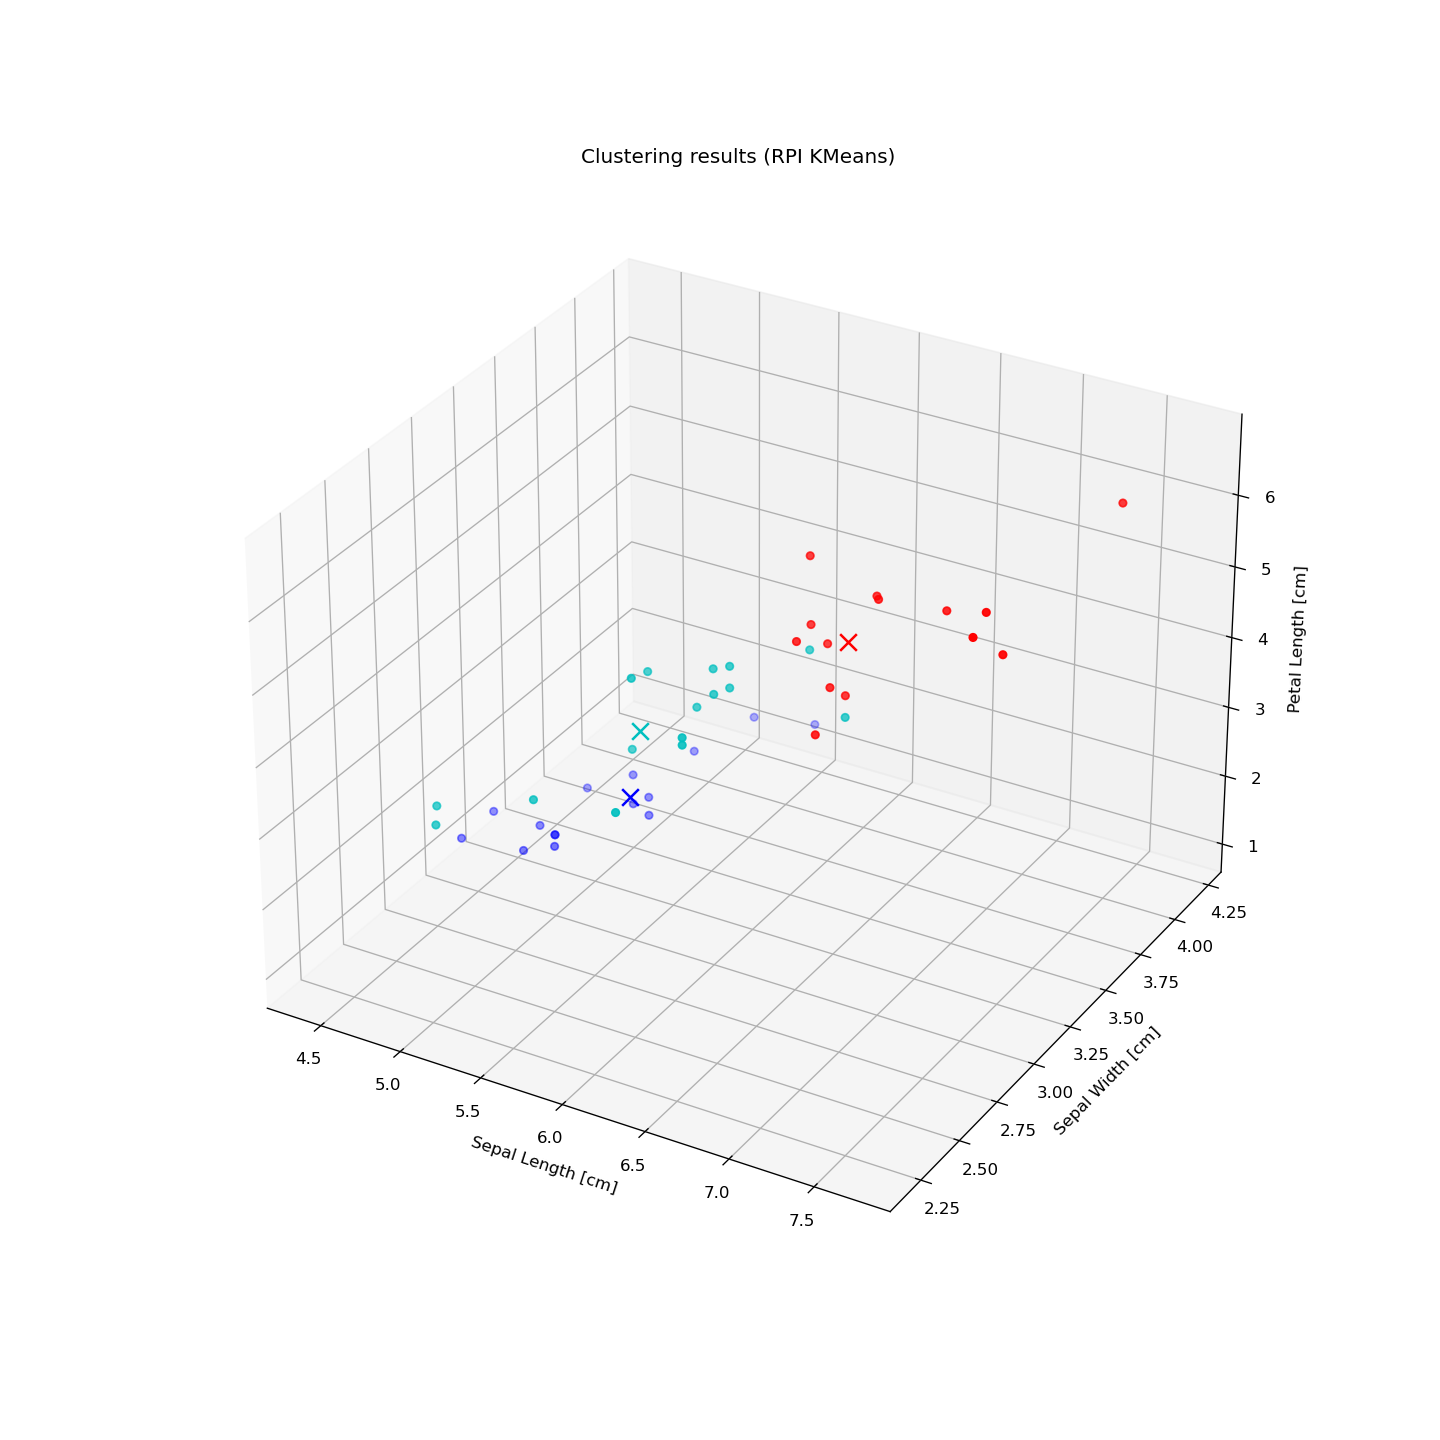

<IPython.core.display.Javascript object>


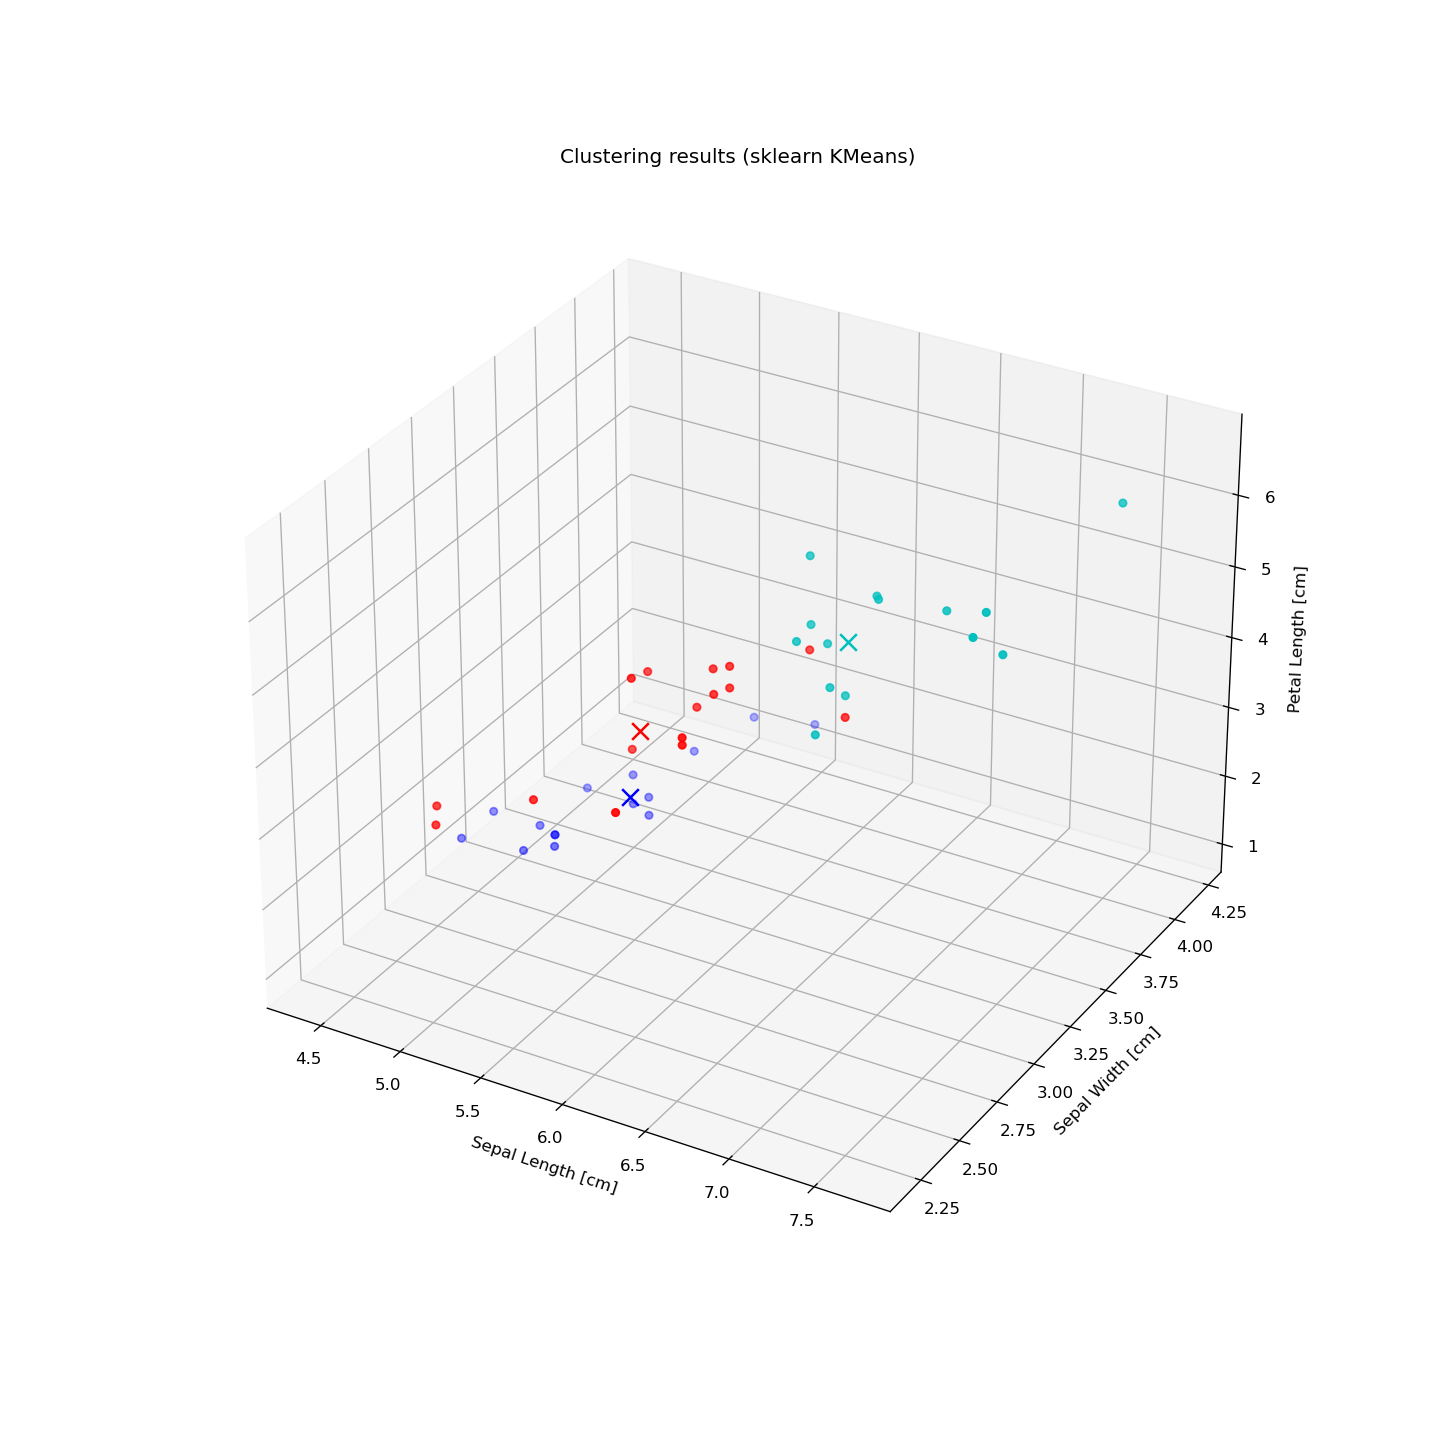


sklearn predicted_labels: [0 2 0 2 2 1 1 0 1 1 2 1 2 1 0 1 0 0 1 1 1 1 1 0 1 0 2 1 2 2 2 2 0 0 0 0 0
 2 2 1 2 0 0 2 0]

sklearn cluster centroids:
[[5.82619048 2.72142857 4.35238095]
 [5.04285714 3.43428571 1.48857143]
 [6.77857143 3.02857143 5.62142857]]


<IPython.core.display.Javascript object>


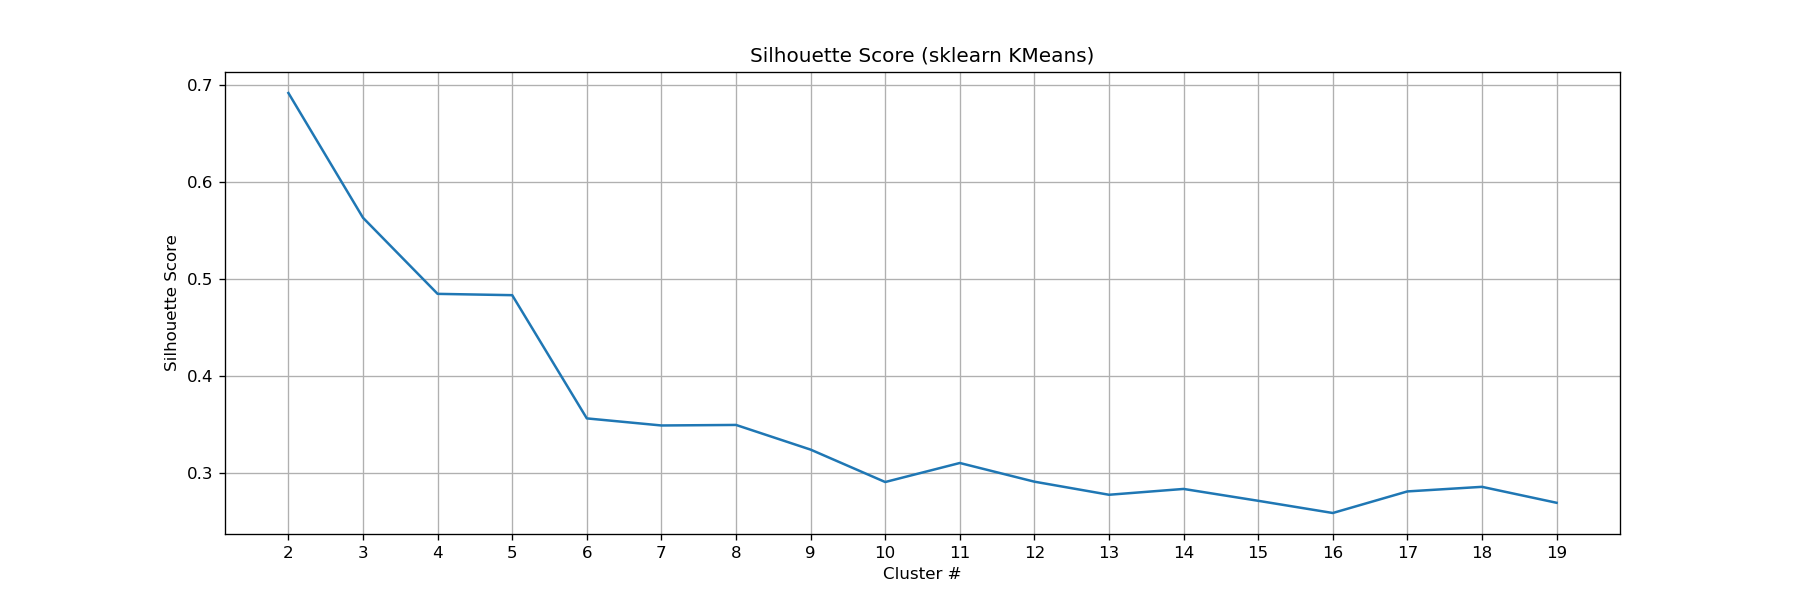


Increasing k can cause overlaps/mistakes due to points being too close together. This is particularly evident at high k.
Although the structure of this code limits k to 7, that value is already high enough to show significant loss
of correlation/relevance of the clustering as k increases. This yields clusters which contain lots of overlap,
which is particularly visible in the silhouette score plot for sklearn, which shows silhouette score drop below the
acceptable value of 0.5 from k=3 to k=4, indicating many points lie either by a cluster boundary
or in the wrong cluster in runs after k=3. Decreasing the value of k to 2 appears to yield two fairly
correlated/clustered sets of points; however, we know from the pre-labeled data that there should be 3 labels.
As a result, k=3 was chosen as the final cluster number. Although coloring scheme differs due to
variations in implementation between sklearn and the RPI code, the actual clustering matches very closely between the
two models as sh

In [111]:
# Problem 3

# define feature matrix with sepal length, sepal width, and petal length, respectively
X = np.array([iris.data.T[0], iris.data.T[1], iris.data.T[2]]).T
y = iris.target

# split testing and training data
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

# tag points with train or test labels
tag = []
for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')

# define k-means model
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)        
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids
    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]
    
# implement k-means model and determine coloring scheme
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
kmeans_col = []
col = ['r', 'b', 'c', 'm', 'k', 'y', 'g'] # limits code to only 7 clusters maximum
for lbl in kmeans_labels:
        kmeans_col.append(col[lbl])
cluster_coords = model.centroids
print('RPI predicted_labels:', kmeans_labels)
print('\nRPI cluster centroids:')
print(cluster_coords)

# plot results
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], color=kmeans_col[:])
for i in range(len(cluster_coords)):
    ax.scatter(cluster_coords[i][0], cluster_coords[i][1], cluster_coords[i][2], color=col[i], marker='x', s=100)
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Sepal Width [cm]')
ax.set_zlabel('Petal Length [cm]')
ax.set_title('Clustering results (RPI KMeans)')
plt.show()

# define sklearn k-means model
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)

# implement sklearn k-means model
skmodel.fit(X_train)
sklearn_labels = skmodel.predict(X_test)
centroids  = skmodel.cluster_centers_

# determine coloring scheme for sklearn
sklearn_col = []
for lbl in sklearn_labels:
        sklearn_col.append(col[lbl])

# plot sklearn results
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], color=sklearn_col[:])
for i in range(len(centroids)):
    ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], color=col[i], marker='x', s=100)
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Sepal Width [cm]')
ax.set_zlabel('Petal Length [cm]')
ax.set_title('Clustering results (sklearn KMeans)')
plt.show()

# print info about clustering
print("\nsklearn predicted_labels:",pred)
print("\nsklearn cluster centroids:")
print(centroids)

# determine silhouette scores for sklearn clustering
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), silhouette_scores)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('Silhouette Score (sklearn KMeans)')
plt.xlabel('Cluster #')
plt.ylabel('Silhouette Score')

# answer question regarding changing cluster #
print("\nIncreasing k can cause overlaps/mistakes due to points being too close together. This is particularly evident at high k.")
print("Although the structure of this code limits k to 7, that value is already high enough to show significant loss")
print("of correlation/relevance of the clustering as k increases. This yields clusters which contain lots of overlap,")
print("which is particularly visible in the silhouette score plot for sklearn, which shows silhouette score drop below the")
print("acceptable value of 0.5 from k=3 to k=4, indicating many points lie either by a cluster boundary") 
print("or in the wrong cluster in runs after k=3. Decreasing the value of k to 2 appears to yield two fairly")
print("correlated/clustered sets of points; however, we know from the pre-labeled data that there should be 3 labels.")
print("As a result, k=3 was chosen as the final cluster number. Although coloring scheme differs due to")
print("variations in implementation between sklearn and the RPI code, the actual clustering matches very closely between the")
print("two models as shown in the 3D plots above. This agreement between models acts as validation for the RPI model, seeing")
print("as the sklearn KMeans model is well-tested and optimized.")
